# Process Results

In [1]:
import os
import re
import pickle

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

## Paths

In [2]:
# Results directory
results_dir = os.path.join(os.path.curdir, os.path.pardir, '2_updating_strategy', 'output')

# Output directory
output_dir = os.path.join(os.path.curdir, 'output')

## Import data

Scenario results

In [3]:
# Filename for weekly summary files
weekly_summary_filenames = [f for f in os.listdir(results_dir) if 'weekly_summary' in f]

# Container for weekly summary results
weekly_summary_results = list()

# Open each file, conver to DataFrame, and store in list
for f in weekly_summary_filenames:
    # Open file
    with open(os.path.join(results_dir, f), 'rb') as g:
        wk = pickle.load(g)
        
    # Conver to DataFrame
    df_wk = pd.DataFrame.from_dict(wk).T
    
    # Append to list holding result summaries for each week
    weekly_summary_results.append(df_wk)    

# Concatenate all weekly summary data in single DataFrame
df_wks = pd.concat(weekly_summary_results)
df_wks = df_wks.reset_index().rename(columns={'index': 'week'})

Plot emissions intensity baseline and rolling scheme revenue for different gain scenarios.

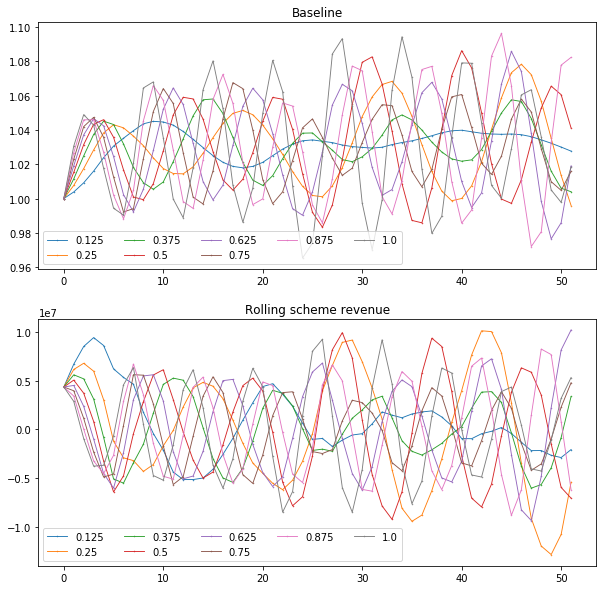

In [4]:
plt.clf()

fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1)

for index, row in df_wks.groupby('gain')[['baseline', 'revenue_rolling']].agg(lambda x: list(x)).drop(0.00).iterrows():
    ax1.plot(row['baseline'], 'o-', linewidth=0.9, markersize=0.5, label=index)
    ax2.plot(row['revenue_rolling'], 'o-', linewidth=0.9, markersize=0.5, label=index)

ax1.set_title('Baseline')
ax1.legend(ncol=5)

ax2.set_title('Rolling scheme revenue')
ax2.legend(ncol=5)

fig.set_size_inches(10,10)
fig.savefig('output/test.pdf')
plt.show()

In [5]:
plt.clf()



gain = 1

for gain in df_wks.gain.unique():
    fig, ax1 = plt.subplots()
    ax2 = ax1.twinx()
    
    ln_revenue = ax1.plot(range(0, 52), df_wks.groupby('gain')[['baseline', 'revenue_rolling']].agg(lambda x: list(x)).loc[gain, 'baseline'], color='r', label='Baseline')
    ln_baseline = ax2.plot(range(0, 52), [r / 1e6 for r in df_wks.groupby('gain')[['baseline', 'revenue_rolling']].agg(lambda x: list(x)).loc[gain, 'revenue_rolling']], color='b', label='Scheme revenue')
    lns = ln_revenue + ln_baseline
    labs = [l.get_label() for l in lns]
    ax1.legend(lns, labs)
    ax1.set_ylabel('Baseline (tCO$_{2}$/MWh)')
    ax2.set_ylabel('Scheme revenue ($)')
    ax1.set_xlabel('Week')
    ax1.minorticks_on()
    ax2.minorticks_on()
    ax1.grid(linestyle='-.')
    ax1.set_title('Gain: {0}'.format(gain))
    plt.show()

ValueError: x and y must have same first dimension, but have shapes (52,) and (104,)

In [6]:
df_wks

,week,baseline,emissions_end_of_week,emissions_intensity_end_of_week,gain,revenue_difference,revenue_net_end_of_week,revenue_rolling,total_energy_demand_end_of_week
0,1,0.000000,3.369322e+06,0.947849,0.0,0.000000e+00,0.000000e+00,0.000000e+00,3554704.395
1,2,0.000000,3.677318e+06,0.939572,0.0,0.000000e+00,0.000000e+00,0.000000e+00,3913823.615
2,3,0.000000,3.665394e+06,0.937943,0.0,0.000000e+00,0.000000e+00,0.000000e+00,3907906.995
3,4,0.000000,3.604091e+06,0.955218,0.0,0.000000e+00,0.000000e+00,0.000000e+00,3773057.115
4,5,0.000000,3.761165e+06,0.945291,0.0,0.000000e+00,0.000000e+00,0.000000e+00,3978845.715
5,6,0.000000,3.824494e+06,0.901793,0.0,0.000000e+00,0.000000e+00,0.000000e+00,4240986.365
6,7,0.000000,3.546697e+06,0.936617,0.0,0.000000e+00,0.000000e+00,0.000000e+00,3786712.015
7,8,0.000000,3.410400e+06,0.943651,0.0,0.000000e+00,0.000000e+00,0.000000e+00,3614048.635
8,9,0.000000,3.606831e+06,0.949194,0.0,0.000000e+00,0.000000e+00,0.000000e+00,3799887.070
9,10,0.000000,3.506644e+06,0.960422,0.0,0.000000e+00,0.000000e+00,0.000000e+00,3651150.580
